In [9]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Carpeta con resultados
evidence_path = "../evidence"

# Leer métricas JSON
def load_metrics(file_path):
    with open(file_path, "r") as f:
        return json.load(f)


In [11]:
import os

print(os.listdir("../evidence/embeddings_val"))


['confusion_matrices.png', 'confusion_matrices_embeddings_val.png', 'f1_per_class.png', 'f1_per_class_embeddings_val.png', 'metrics.txt', 'metrics_embeddings_val.json', 'metrics_embeddings_val.txt', 'precision_recall_embeddings_val.png']


In [12]:
baseline_val = load_metrics("../evidence/baseline_val/metrics_baseline_val.json")
baseline_test = load_metrics("../evidence/baseline_test/metrics_baseline_test.json")
embeddings_val = load_metrics("../evidence/embeddings_val/metrics_embeddings_val.json")
embeddings_test = load_metrics("../evidence/embeddings_test/metrics_embeddings_test.json")

In [13]:
# Comparación en tabla
rows = []
for metrics in [baseline_val, baseline_test, embeddings_val, embeddings_test]:
    rows.append({
        "Modelo": f"{metrics['model']} ({metrics['split']})",
        "Exact Match": metrics["exact_match"],
        "F1 Micro": metrics["f1_micro"],
        "F1 Macro": metrics["f1_macro"],
    })

df = pd.DataFrame(rows)
display(df)

,Modelo,Exact Match,F1 Micro,F1 Macro
0,baseline (val),0.639860,0.800595,0.734242
1,baseline (test),0.654979,0.811611,0.766283
2,embeddings (val),0.702797,0.857538,0.847742
3,embeddings (test),0.676017,0.852747,0.847074


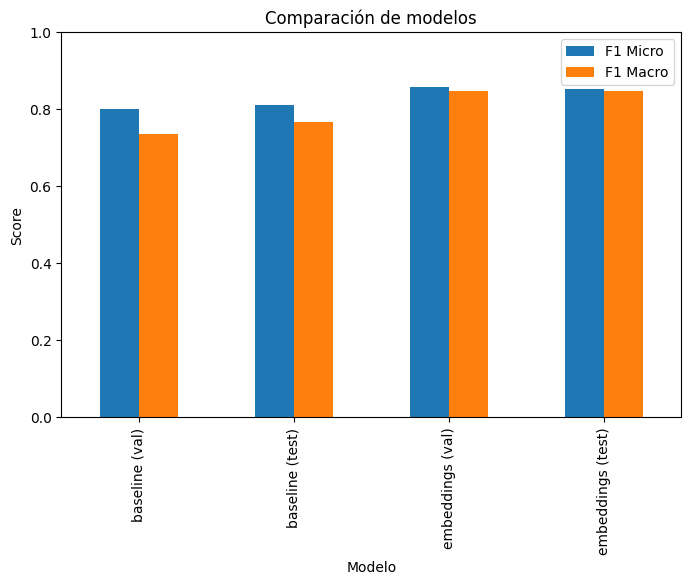

In [14]:
# Gráfico comparativo F1
df.set_index("Modelo")[["F1 Micro", "F1 Macro"]].plot(kind="bar", figsize=(8,5))
plt.title("Comparación de modelos")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()